# Part 1: Uploading the Dataset

In [2]:
import prince
import pandas as pd
path =r"C:\Users\loicd\Downloads\bank+marketing\bank\bank-full.csv"
dataset = pd.read_csv(path, sep=';')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Display basic information
print("Dataset Info:")
dataset.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Part 2 Contingency table

From the dataset exploration, the following are categorical variables:

- job
- marital
- education
- default
- housing
- loan
- contact
- month
- poutcome
- y

For this analysis, we select "Job" and "Education" as they provide insightful categorical information for comparison.

In [4]:
contingency_table = pd.crosstab(dataset['job'], dataset['education'])
print(contingency_table)

education      primary  secondary  tertiary  unknown
job                                                 
admin.             209       4219       572      171
blue-collar       3758       5371       149      454
entrepreneur       183        542       686       76
housemaid          627        395       173       45
management         294       1121      7801      242
retired            795        984       366      119
self-employed      130        577       833       39
services           345       3457       202      150
student             44        508       223      163
technician         158       5229      1968      242
unemployed         257        728       289       29
unknown             51         71        39      127


# Part 3: Performing CA using prince

In [5]:
#initialize CA model
ca = prince.CA(
    n_components=3,
    n_iter=2,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Step 2: Fit the CA Model
• Fit the CA model to the dataset:

In [6]:

ca = ca.fit(contingency_table)
print(ca)

In [7]:
#Eigenvalues
print(ca.eigenvalues_summary)
print(ca.total_inertia_)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.442        70.10%                     70.10%
1              0.152        24.13%                     94.23%
2              0.036         5.77%                    100.00%
0.6300045664368494


# Transforming the data and getting the new columns and rows’ coordinates 

In [8]:
#Transform the data to get coordinates
row_coords = ca.row_coordinates(contingency_table)

col_coords = ca.column_coordinates(contingency_table)

#Display row coordinates
print(row_coords.head())
print(col_coords.head())

                     0         1         2
job                                       
admin.       -0.341168 -0.508740 -0.030484
blue-collar  -0.679251  0.410864 -0.033238
entrepreneur  0.364830  0.091612  0.065888
housemaid    -0.471371  0.866615 -0.100010
management    1.156580  0.154597 -0.022469
                  0         1         2
education                              
primary   -0.650025  0.826709 -0.073061
secondary -0.376185 -0.299489 -0.037240
tertiary   1.015998  0.081636 -0.025563
unknown   -0.178903  0.107231  0.917926


# Part 4: Visualization & Interpretation
We can use the plot() function of prince library or use matplotlib (as we did in the PCA lab): 
• 1st visualization: Biplot showing the row and column factor maps:

In [9]:
ca.plot(
    contingency_table,
    x_component=0,
    y_component=1,
    show_row_markers=True,
    show_column_markers=True,
    show_row_labels=False,
    show_column_labels=False
)

alt.LayerChart(...)

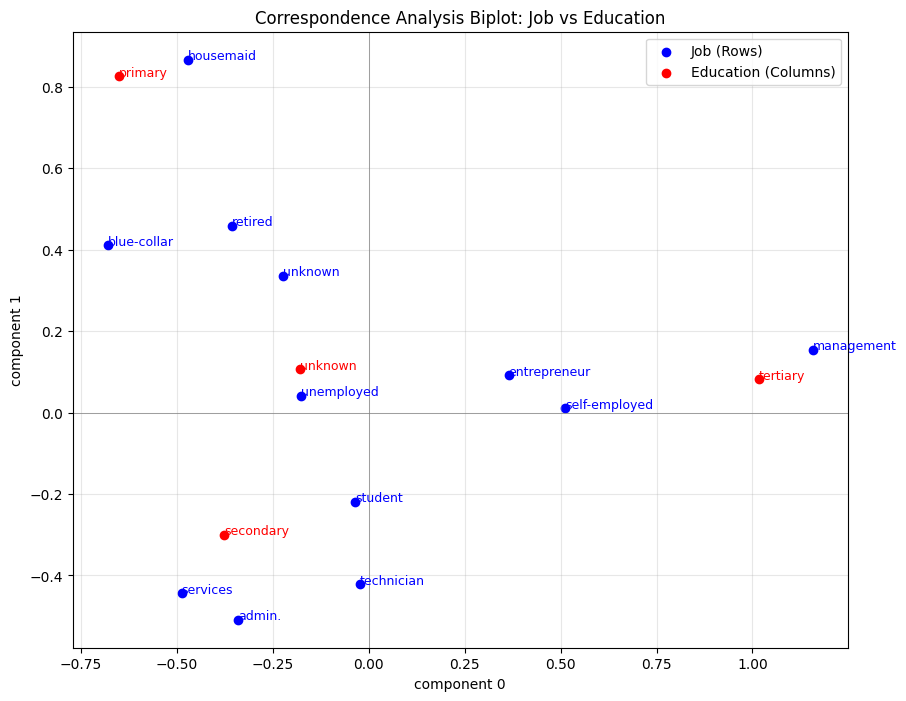

In [10]:
# Biplot
import matplotlib.pyplot as plt
import seaborn as sns

row_x, row_y = row_coords[0], row_coords[1]
col_x, col_y = col_coords[0], col_coords[1]

plt.figure(figsize=(10, 8))
plt.scatter(row_x, row_y, color='blue', label='Job (Rows)')
plt.scatter(col_x, col_y, color='red', label='Education (Columns)')


for i, job in enumerate(contingency_table.index):
    plt.text(row_x.iloc[i], row_y.iloc[i], job, color='blue', fontsize=9)
for i, edu in enumerate(contingency_table.columns):
    plt.text(col_x.iloc[i], col_y.iloc[i], edu, color='red', fontsize=9)

plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.title("Correspondence Analysis Biplot: Job vs Education")
plt.xlabel("component 0")
plt.ylabel("component 1")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


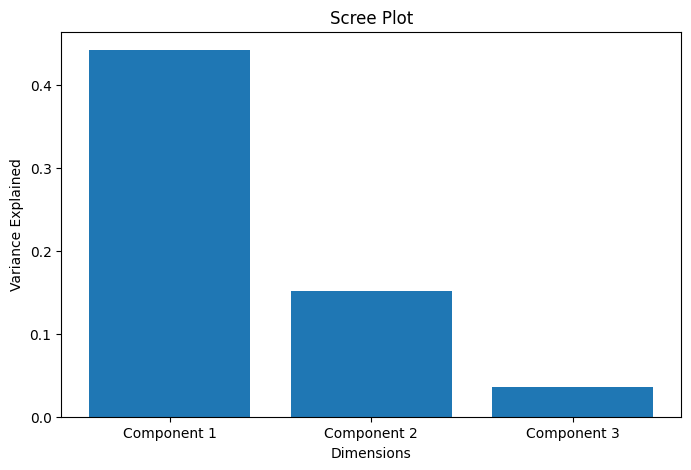

In [11]:
# Scree plot
eigenvalues = ca.eigenvalues_
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, tick_label=[f'Component {i+1}' for i in range(len(eigenvalues))])
plt.title("Scree Plot")
plt.xlabel("Dimensions")
plt.ylabel("Variance Explained")
plt.show()


**Displaying the contributions of columns to the 1st dimension in a barplot:**

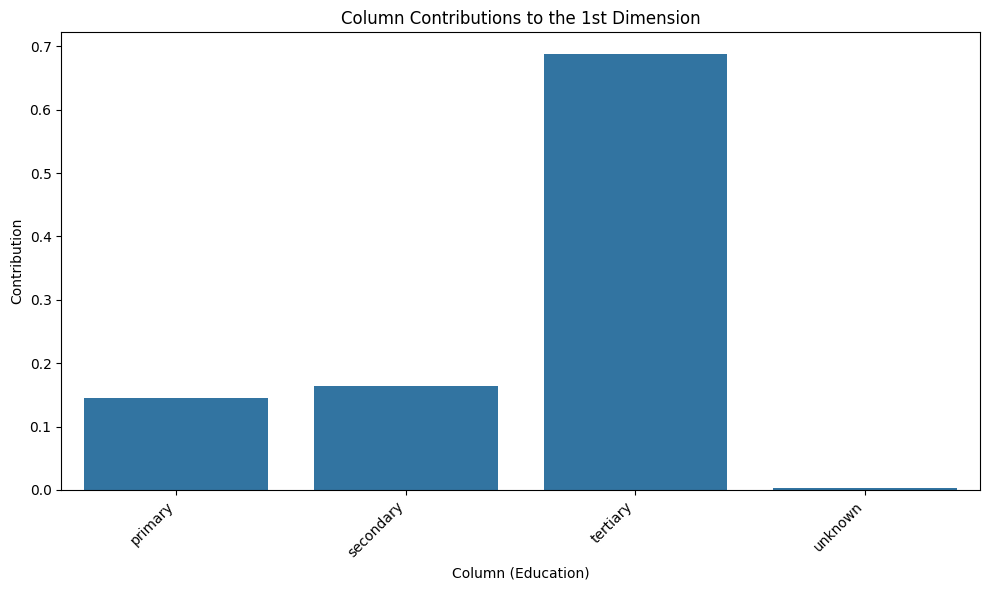

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

column_contributions = ca.column_contributions_

#convert the column contributions to a dataframe for easy plotting
contrib_df = column_contributions.iloc[:, 0] #use first dimension 

#plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=contrib_df.index, y=contrib_df.values)
plt.title('Column Contributions to the 1st Dimension')
plt.xlabel('Column (Education)')
plt.ylabel('Contribution')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show() 

**Displaying the contributions of rows to the 1st
 dimension in a barplot. 
Change the above code.**

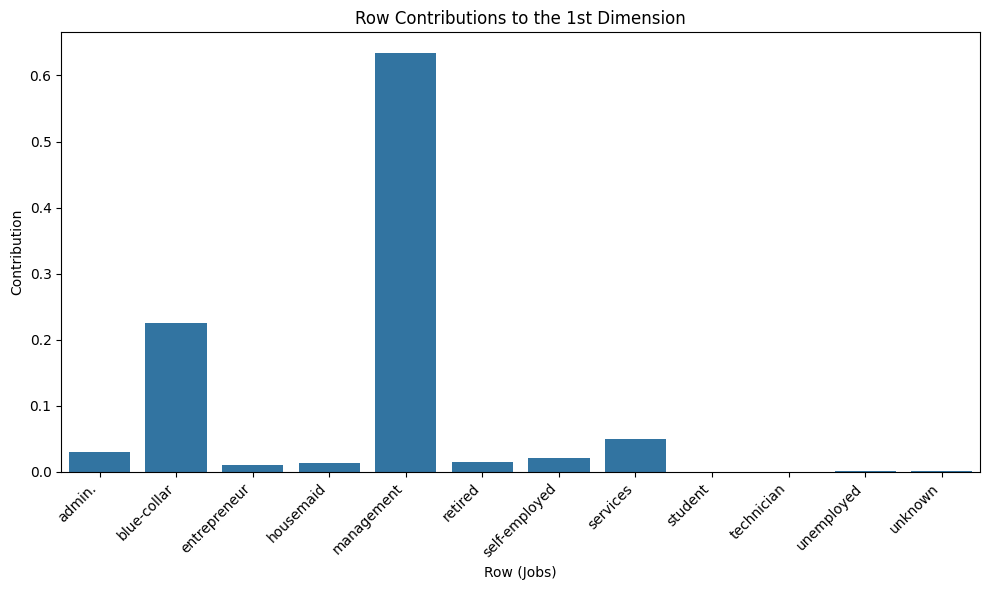

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Access the row contributions to the 1st dimension
row_contributions = ca.row_contributions_

# Convert the row contributions to a dataframe for easy plotting
contrib_df = row_contributions.iloc[:, 0]  # Use the first dimension (component 0)

# Plot the bar chart for row contributions
plt.figure(figsize=(10, 6))
sns.barplot(x=contrib_df.index, y=contrib_df.values)
plt.title('Row Contributions to the 1st Dimension')
plt.xlabel('Row (Jobs)')
plt.ylabel('Contribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


• Getting the quality representation of each point in the 1st dimension: 
- Cosine similarities of Columns (Candidates): 

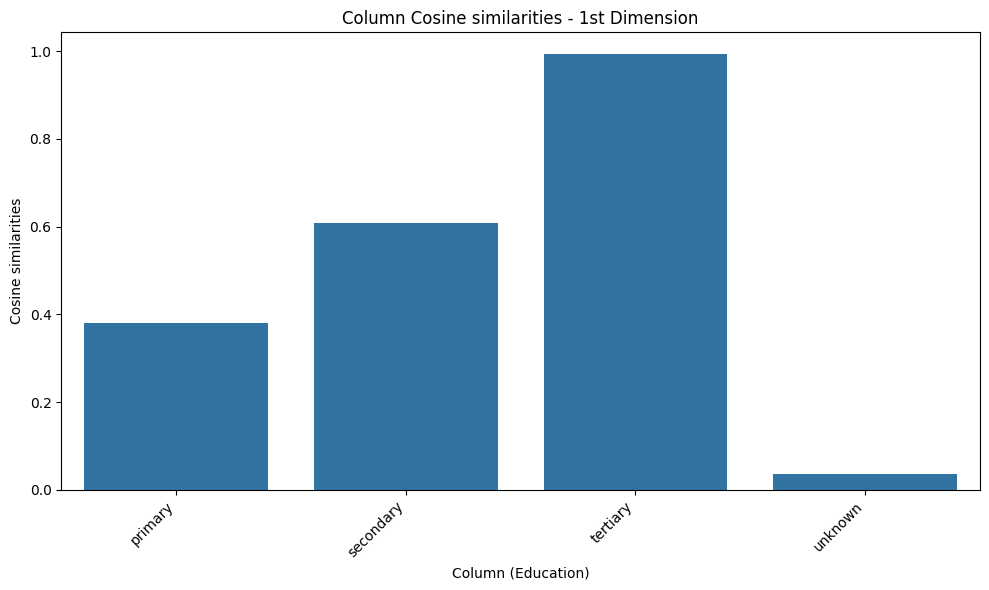

In [17]:
col_cos = ca.column_cosine_similarities(contingency_table)

col_cos_df = col_cos.iloc[:,0]

#plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=col_cos_df.index, y=col_cos_df.values)
plt.title('Column Cosine similarities - 1st Dimension')
plt.xlabel('Column (Education)')
plt.ylabel('Cosine similarities')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()

# Part 5 INTEPRETATION

Eigenvalues Interpretation:

Dimension 1 explains 70.10% of the variance.
Dimension 2 explains 24.13%, bringing the cumulative explained variance to 94.23%.
This indicates that the first two dimensions capture most of the relationship between "Job" and "Education."
Biplot Interpretation:

Jobs like "Management" are closely associated with "Tertiary" education, as they are positioned near each other.
Jobs like "Blue-collar" are more associated with "Primary" education.
Jobs like "Services" and "Admin" tend to align with "Secondary" education.
"Unknown" education and job categories show no strong associations.

Insights from the Correspondence Analysis:
Key Associations:

"Management" is strongly associated with "Tertiary" education:
This reflects that individuals with higher education levels are more likely to hold management positions.
"Blue-collar" is closely aligned with "Primary" education:
Indicates that these jobs are more common among individuals with lower educational attainment.
"Services" and "Admin" align with "Secondary" education:
Suggests that intermediate educational levels are prevalent in these professions.
Distinct Categories:

"Housemaid" has a strong association with "Primary" education but stands separately in Dimension 2, indicating a distinct relationship compared to other jobs.
"Student" is positioned uniquely near "Secondary" education, reflecting a natural association with intermediate education levels.
Outliers:

"Unknown" categories for both jobs and education are clustered together near the origin:
Indicates these categories have minimal specific associations with other variables.
"Retired" has no strong alignment with specific education levels, likely reflecting its population diversity.
Variance Explained:

The first two dimensions explain 94.23% of the total variance:
This suggests that the relationships between "Job" and "Education" are well captured by the biplot.
Practical Implications:

Jobs requiring specialized knowledge (e.g., "Management") are dominated by individuals with tertiary education.
Lower-skilled jobs like "Blue-collar" and "Housemaid" predominantly attract those with primary education.
Categories like "Unknown" highlight potential data gaps or undefined relationships, which could require further investigation.

# Part 6: Conclusions & QA



### Conclusion:

The Correspondence Analysis of the "Job" and "Education" variables reveals significant relationships between educational attainment and job roles:

1. **Strong Associations**:
   - Jobs requiring higher qualifications, such as "Management," are strongly associated with tertiary education, reflecting the demand for specialized knowledge in these roles.
   - Conversely, roles such as "Blue-collar" and "Housemaid" are predominantly linked to primary education, illustrating a clear stratification based on educational attainment.

2. **Intermediate Roles**:
   - Jobs like "Admin" and "Services" are associated with secondary education, indicating that intermediate education levels open opportunities for clerical and customer-facing positions.

3. **Unique Observations**:
   - Categories like "Student" and "Retired" stand out as distinct, reflecting specific demographic or life-stage relationships with education and job roles.

4. **Outliers**:
   - The "Unknown" categories cluster near the origin, showing minimal associations and suggesting either data gaps or undefined relationships.

5. **Explained Variance**:
   - With 94.23% of the variance explained by the first two dimensions, the analysis effectively captures the relationships between jobs and education, offering a reliable visualization of these associations.

This analysis highlights the importance of educational qualifications in shaping job opportunities and workforce segmentation. It provides actionable insights for stakeholders such as policymakers, educators, and employers in addressing workforce disparities and planning educational or training programs.